#  Compound Stats

Import necessary libraries

In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The `BASE_URL` will point the notebook at the Django API. If using localhost, the Django project must be running.

In [2]:
BASE_URL = 'http://127.0.0.1:8000/api/'
next_url = BASE_URL + 'matches'

In [3]:
full_time_results = [0, 0, 0]
half_time_results = [0, 0, 0]
home_shots = 0
away_shots = 0
home_shots_on_target = 0
away_shots_on_target = 0
home_corners = 0
away_corners = 0
home_fouls = 0
away_fouls = 0
home_yellow_cards = 0
away_yellow_cards = 0
home_red_cards = 0
away_red_cards = 0

The API is paginated, with the `next` field being `null` when the last page is reached

In [4]:
while next_url is not None:
    response = requests.get(next_url)
    data = json.loads(response.text)
    
    for match in data['results']:
        if match['full_time_result'] == 'H':
            full_time_results[0] += 1
        elif match['full_time_result'] == 'D':
            full_time_results[1] += 1
        else:
            full_time_results[2] += 1
        
        if match['half_time_result'] == 'H':
            half_time_results[0] += 1
        elif match['half_time_result'] == 'D':
            half_time_results[1] += 1
        else:
            half_time_results[2] += 1
        
        home_shots += match['home_total_shots']
        away_shots += match['away_total_shots']
        home_shots_on_target += match['home_shots_on_target']
        away_shots_on_target += match['away_shots_on_target']
        home_corners += match['home_corners']
        away_corners += match['away_corners']
        home_fouls += match['home_fouls_committed']
        away_fouls += match['away_fouls_committed']
        home_yellow_cards += match['home_yellow_cards']
        away_yellow_cards += match['away_yellow_cards']
        home_red_cards += match['home_red_cards']
        away_red_cards += match['away_red_cards']
    
    next_url = data['next']

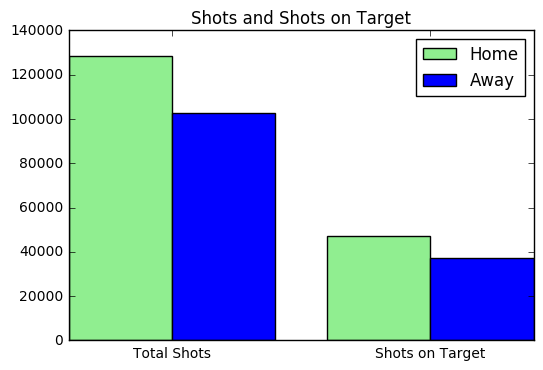

In [7]:
# Show total shots and shots on target bar chart
x = np.arange(2)

plt.title('Shots and Shots on Target')

home = [
    home_shots,
    home_shots_on_target
]

away = [
    away_shots,
    away_shots_on_target
]

ax = plt.subplot(111)
home_stats = ax.bar(x - 0.2, home, width=0.4, color='lightgreen', align='center')
away_stats = ax.bar(x + 0.2, away, width=0.4, color='b', align='center')
ax.set_xticks(x)
ax.set_xticklabels(['Total Shots', 'Shots on Target'])

ax.legend((home_stats[0], away_stats[0]), ('Home', 'Away'))

plt.show()

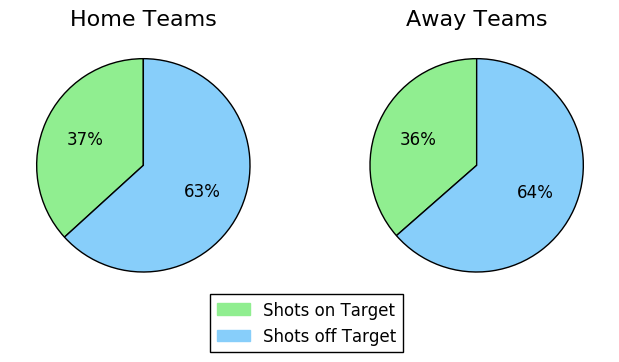

In [113]:
import matplotlib.patches as mpatches

# create figure
figwidth = 10.0    # inches
figheight = 3.5   # inches
plt.figure(1, figsize=(figwidth, figheight))
plt.figure(1, figsize=(figwidth, figheight))
plt.figure(1, figsize=(figwidth, figheight))
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.titlesize'] = 16.0
plt.rcParams['xtick.labelsize'] = 12.0
plt.rcParams['legend.fontsize'] = 12.0
colors=('lightgreen','lightskyblue')
Ncols = 3
plotheight = figwidth/Ncols
H = plotheight/figheight
W = 1.0 / Ncols
margin = 0.1
left = [W*margin, W*(1+margin), W*(2+margin)]
bottom = H*margin
width = W*(1-2*margin)
height = H*(1-2*margin)
labels = ['Shots on Target', 'Shots off Target']

# Home Team
utilized = 10.0
free = 100.0 - utilized
home_data = [home_shots_on_target, home_shots - home_shots_on_target]
plt.axes([left[0], bottom, width, height])
patches = plt.pie(home_data, colors=colors, autopct='%1.f%%', startangle=90)
plt.title('Home Teams')

on_target_patch = mpatches.Patch(color=colors[0], label=labels[0])
off_target_patch = mpatches.Patch(color=colors[1], label=labels[1])
plt.legend(handles=[on_target_patch, off_target_patch], loc=(0.75, -0.2))

# ROM utilization
utilized = 30.0
free = 100.0 - utilized
away_data = [away_shots_on_target, away_shots - away_shots_on_target]
plt.axes([left[1], bottom, width, height])
patches = plt.pie(away_data, colors=colors, autopct='%1.f%%', startangle=90)
plt.title('Away Teams')

plt.show()

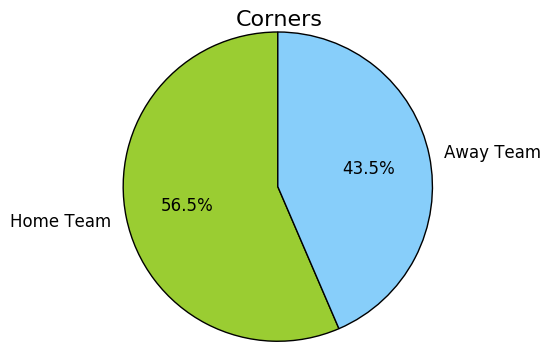

In [108]:
# labels = 'Home', 'Away'
sizes = [home_corners, away_corners]
colors = ['yellowgreen', 'lightskyblue']
labels = ['Home Team', 'Away Team']

plt.title('Corners')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

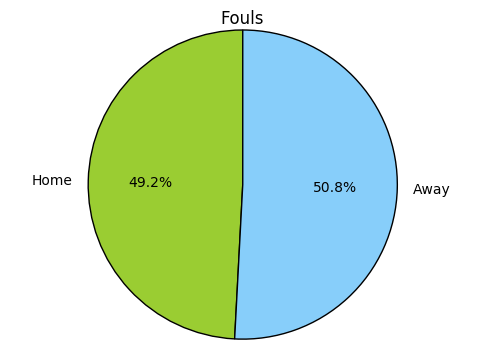

In [29]:
labels = 'Home', 'Away'
sizes = [home_fouls, away_fouls]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Fouls')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

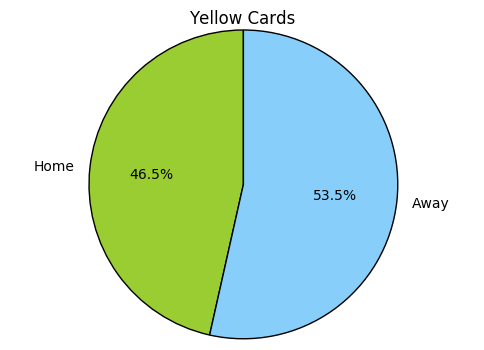

In [28]:
labels = 'Home', 'Away'
sizes = [home_yellow_cards, away_yellow_cards]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Yellow Cards')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

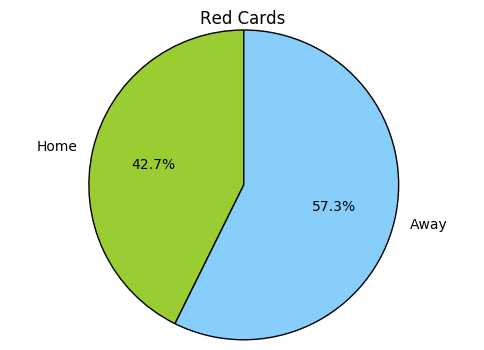

In [27]:
labels = 'Home', 'Away'
sizes = [home_red_cards, away_red_cards]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Red Cards')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()